In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
y_train[0]

array([6], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)

In [6]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

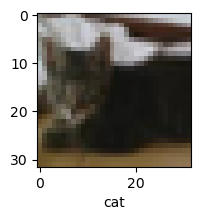

In [9]:
plot_sample(X_train, y_train, 9)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 111ms/step - accuracy: 0.2757 - loss: 2.2506


In [35]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

C:\Users\huyho\anaconda3\envs\python-jupyter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [18]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6332 - loss: 1.0523
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6640 - loss: 0.9680
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6849 - loss: 0.9111
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7005 - loss: 0.8602
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7145 - loss: 0.8181
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7359 - loss: 0.7691
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7350 - loss: 0.7549
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7502 - loss: 0.7145
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7561 - loss: 0.6933
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7697 - loss: 0.6673


In [19]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6946 - loss: 0.9143


[0.9337046146392822, 0.6883999705314636]

In [21]:
y_pred = cnn.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.0881315e-03, 2.5835021e-05, 4.3324400e-02, ..., 1.2533904e-04,
        2.1482877e-01, 2.3042814e-04],
       [1.7686797e-02, 2.2004959e-01, 1.9135980e-06, ..., 3.1640843e-09,
        7.6141417e-01, 8.4745942e-04],
       [1.6604116e-02, 1.9953728e-01, 3.6847833e-04, ..., 2.0787995e-05,
        7.7675706e-01, 4.9794740e-03],
       ...,
       [4.9698547e-06, 3.0543009e-07, 6.0040299e-02, ..., 1.6949702e-02,
        1.0938755e-05, 2.7048387e-05],
       [1.9420071e-02, 4.4522819e-01, 2.1756742e-02, ..., 2.0558069e-05,
        1.5174710e-03, 3.0469349e-05],
       [1.5647175e-06, 2.4014085e-05, 6.0186412e-05, ..., 9.9893755e-01,
        1.3924947e-06, 1.8329710e-06]], dtype=float32)

In [36]:
y_pred_label = [np.argmax(element) for element in y_pred]
y_pred_label

[5,
 8,
 8,
 0,
 4,
 6,
 9,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 6,
 5,
 7,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 9,
 4,
 9,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 5,
 7,
 7,
 4,
 9,
 8,
 5,
 4,
 8,
 8,
 7,
 8,
 5,
 6,
 7,
 3,
 6,
 2,
 6,
 2,
 1,
 2,
 5,
 2,
 2,
 5,
 8,
 8,
 9,
 2,
 0,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 5,
 7,
 2,
 8,
 8,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 8,
 6,
 8,
 5,
 4,
 0,
 0,
 2,
 1,
 5,
 0,
 4,
 6,
 5,
 8,
 3,
 1,
 2,
 8,
 0,
 2,
 3,
 6,
 2,
 4,
 1,
 9,
 9,
 1,
 2,
 9,
 7,
 4,
 8,
 6,
 5,
 6,
 5,
 1,
 4,
 6,
 6,
 5,
 2,
 8,
 9,
 6,
 0,
 2,
 5,
 6,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 0,
 7,
 8,
 4,
 9,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 6,
 7,
 5,
 2,
 0,
 5,
 2,
 2,
 4,
 8,
 6,
 2,
 6,
 8,
 5,
 8,
 7,
 1,
 7,
 4,
 8,
 8,
 2,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 6,
 1,
 5,
 7,
 8,
 0,
 0,
 9,
 0,
 4,
 7,
 3,
 9,
 5,
 5,
 9,
 2,
 2,
 3,
 2,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 9,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 2,
 1,
 8,
 2,
 0,


In [28]:
y_pred_label[0]

5

TypeError: only integer scalar arrays can be converted to a scalar index

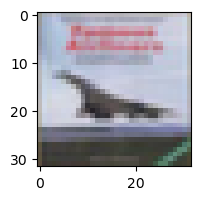

In [31]:
plot_sample(X_test,y_test,3)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print("Classification report: \n",classification_report(y_test,y_pred_label))

Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      1000
           1       0.76      0.81      0.78      1000
           2       0.61      0.55      0.58      1000
           3       0.56      0.41      0.48      1000
           4       0.61      0.68      0.64      1000
           5       0.60      0.61      0.61      1000
           6       0.76      0.78      0.77      1000
           7       0.77      0.70      0.74      1000
           8       0.76      0.81      0.78      1000
           9       0.68      0.83      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

